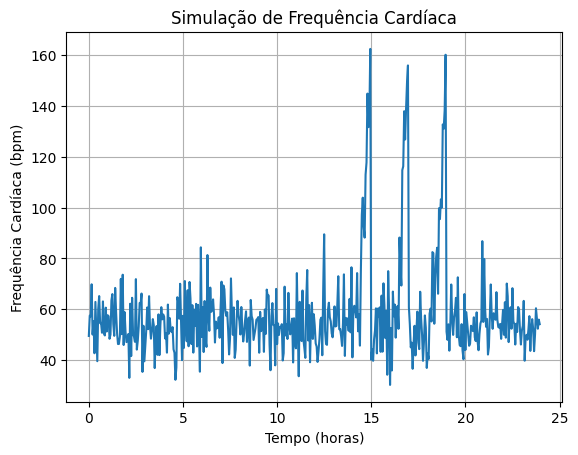

In [2]:
import numpy as np
import matplotlib.pyplot as plt

picos_horarios = [14, 16, 18]

tempo_total = 24
intervalo = 0.05

tempo = np.arange(0, tempo_total, intervalo)

frequencia_cardiaca = np.zeros_like(tempo)

duracao_pico = int(1 / intervalo)

limite_minimo = 50
limite_maximo = 160

tendencia = np.zeros_like(tempo)
for pico_horario in picos_horarios:
    indice_inicio_pico = int(pico_horario * (1 / intervalo))
    tendencia[indice_inicio_pico:indice_inicio_pico + duracao_pico] += np.linspace(0, 1, duracao_pico) ** 2
    
# Adicionar variações aleatórias à tendência
tendencia += np.random.normal(0, 0.1, len(tempo))

# Limitar os valores mínimos e máximos da tendência
tendencia = np.clip(tendencia, 0, 1)

# Multiplica a tendência pelos limites desejados para obter a frequência cardíaca
frequencia_cardiaca = tendencia * (limite_maximo - limite_minimo) + limite_minimo

# Adicionar um pouco de ruído aos dados
frequencia_cardiaca += np.random.normal(0, 5, len(tempo))

frequencia_cardiaca[0:indice_inicio_pico] += np.random.normal(0, 5, indice_inicio_pico)


plt.plot(tempo, frequencia_cardiaca)
plt.title('Simulação de Frequência Cardíaca')
plt.xlabel('Tempo (horas)')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.grid(True)
plt.show()

